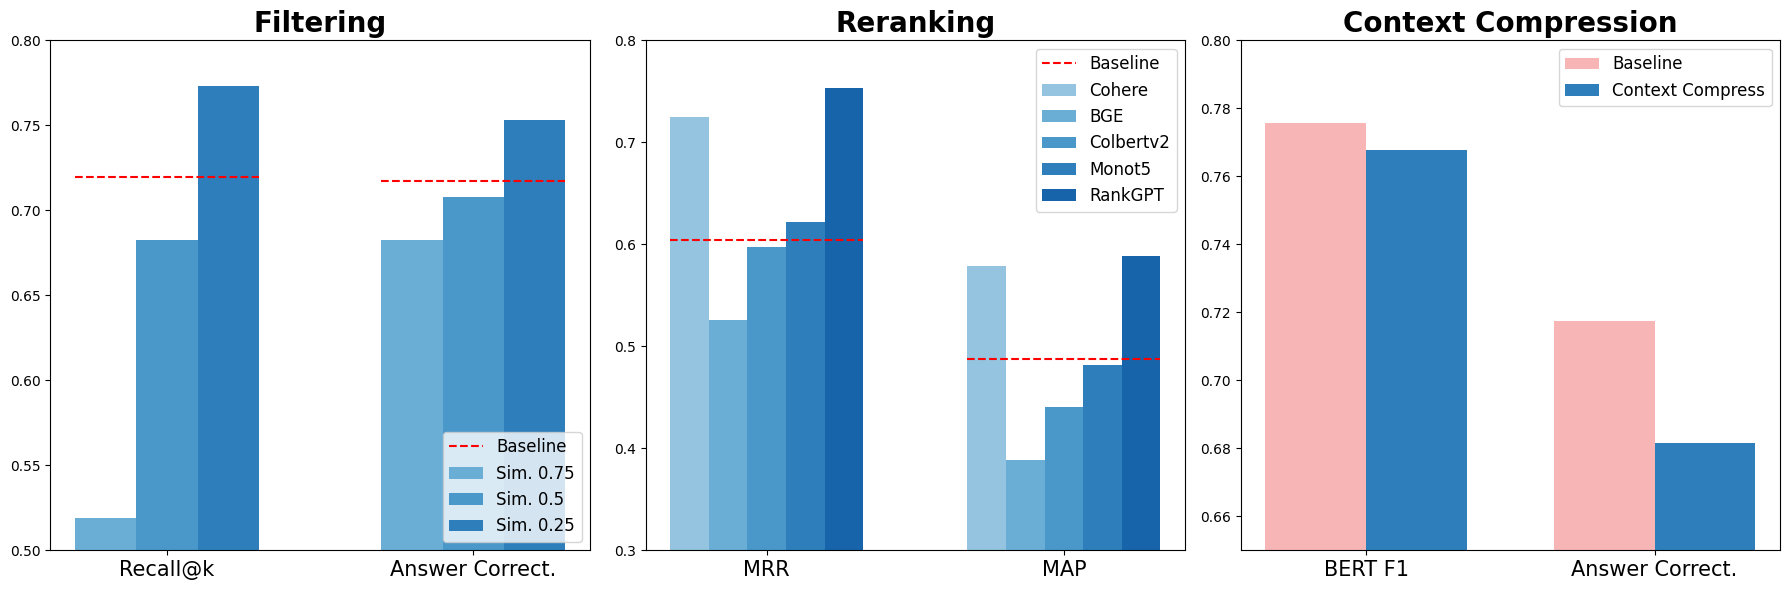

In [ ]:
# Code Generated with the help of ChatGPT

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten
data = {
    "Filtering": {
        "Sim. 0.25": [0.7730, 0.7531],
        "Sim. 0.5": [0.6827, 0.7076],
        "Sim. 0.75": [0.5190, 0.6826],
        "Baseline": [0.7197, 0.7175]
    },
    "Reranking": {
        "Cohere": [0.7250, 0.5790],
        "BGE": [0.5253, 0.3890],
        "Colbertv2": [0.5977, 0.4407],
        "Monot5": [0.6220, 0.4814],
        "RankGPT": [0.7533, 0.5889],
        "Baseline": [0.6040, 0.4880]
    },
    "Context Compression": {
        "Baseline": [0.7756, 0.7175],
        "Context Compress": [0.7677, 0.6815]
    }
}

filtering_metrics = ["Recall@k", "Answer Correct."]
reranking_metrics = ["MRR", "MAP"]


# Farbschema: feste Zuordnung pro Methode
blue_colors = plt.cm.Blues(np.linspace(0.4, 0.8, 5))  # 5 Blautöne
filtering_methods = ["Sim. 0.75", "Sim. 0.5", "Sim. 0.25"]
reranking_methods = ["Cohere", "BGE", "Colbertv2", "Monot5", "RankGPT"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Filtering
x = np.arange(len(filtering_metrics))
width = 0.2
for i, method in enumerate(filtering_methods):
    axes[0].bar(x + i * width, data["Filtering"][method], width, label=method, color=blue_colors[i+1])
axes[0].hlines(data["Filtering"]["Baseline"], xmin=x - width/2, xmax=x + width*(len(filtering_methods)-1) + width/2,
               colors="red", linestyles="--", label="Baseline")
axes[0].set_title("Filtering", fontsize=20, fontweight='bold')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(filtering_metrics, fontsize=15)
axes[0].set_ylim(0.5, 0.8)
axes[0].legend(loc="lower right", fontsize=12)

# Plot 2: Reranking
x = np.arange(len(reranking_metrics))
width = 0.13
for i, method in enumerate(reranking_methods):
    axes[1].bar(x + i * width, data["Reranking"][method], width, label=method, color=blue_colors[i % len(blue_colors)])
axes[1].hlines(data["Reranking"]["Baseline"], xmin=x - width/2, xmax=x + width*(len(reranking_methods)-1) + width/2,
               colors="red", linestyles="--", label="Baseline")
axes[1].set_title("Reranking", fontsize=20, fontweight='bold')
axes[1].set_xticks(x + width*2)
axes[1].set_xticklabels(reranking_metrics, fontsize=15)
axes[1].set_ylim(0.3, 0.8)
axes[1].legend(loc="upper right", fontsize=12)

# Plot 3: Context Compression (nur Generation-Metriken, Baseline als Balken)
cc_metrics = ["BERT F1", "Answer Correct."]
baseline_vals = data["Context Compression"]["Baseline"]
context_vals = data["Context Compression"]["Context Compress"]

x = np.arange(len(cc_metrics))
width = 0.35
axes[2].bar(x - width/2, baseline_vals, width, label="Baseline", color="#F7B5B5")
axes[2].bar(x + width/2, context_vals, width, label="Context Compress", color=blue_colors[3])
axes[2].set_title("Context Compression", fontsize=20, fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(cc_metrics, fontsize=15)
axes[2].set_ylim(0.65, 0.8)
axes[2].legend(fontsize=12)

plt.tight_layout()
plt.savefig("reranking_selection_metrics.png", dpi=300, bbox_inches='tight')
plt.show()
